In [1]:
import nevis

In [2]:
nevis.dimensions()

(700000, 1300000)

(<Figure size 453x734 with 1 Axes>,
 <AxesSubplot:>,
 array([[ -7.111519 ,  -6.841461 ,  -6.5714035, ..., -31.004333 ,
         -31.274185 , -31.544037 ],
        [ -7.3815765,  -7.111519 ,  -6.841461 , ..., -30.734482 ,
         -31.004333 , -31.274185 ],
        [ -7.21154  ,  -6.9414825,  -6.671425 , ..., -30.46463  ,
         -30.734482 , -31.004333 ],
        ...,
        [-13.732933 , -13.462875 , -13.192818 , ..., -60.188293 ,
         -60.458145 , -60.727997 ],
        [-14.002991 , -13.732933 , -13.462875 , ..., -59.91844  ,
         -60.188293 , -60.458145 ],
        [-14.273048 , -14.002991 , -13.732933 , ..., -59.64859  ,
         -59.91844  , -60.188293 ]], dtype=float32),
 <function nevis._plot.plot.<locals>.meters2indices(x, y)>)

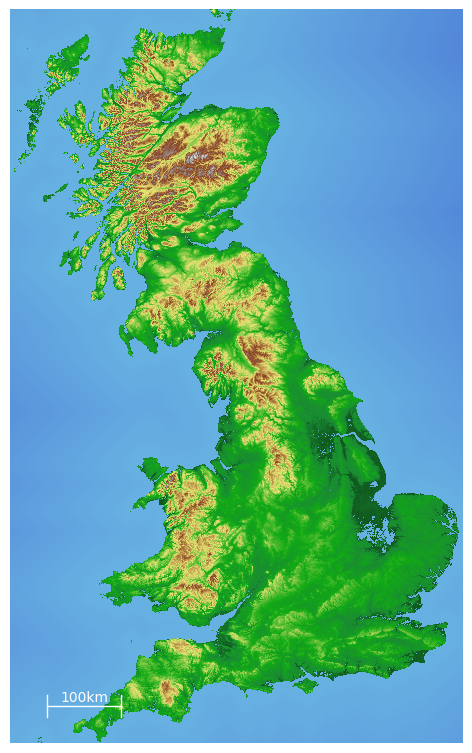

In [17]:
nevis.plot(
    boundaries=(50000, 660000, 10000, 1000000)
)



In [23]:
import nlopt
import numpy as np
import matplotlib.pyplot as plt
import random
nevis.download_os_terrain_50()

Downloaded, unpacked, and processed file already found: Skipping.


In [25]:
f = nevis.linear_interpolant()
f_grad = nevis.linear_interpolant(grad=True)
x_max, y_max = nevis.dimensions()

points = []
pre_max = [] # heighest hill that has been visited

def myfunc(u, grad):
    x, y = u
    points.append([x, y])
    z, (gx, gy) = f_grad(x, y)
    if grad.size > 0:
        grad[0] = gx
        grad[1] = gy
    if not pre_max:
        pre_max.append(z)
    else:
        pre_max.append(max(z, pre_max[-1]))
    return z


In [35]:
x_low_range = (0, 50000)
x_high_range = (660000, 700000)
y_low_range = (0, 10000)
y_high_range = (1000000, 1300000)

def run(method):
    global points, pre_max
    opt = nlopt.opt(method, 2)

    x_low = random.randint(*x_low_range)
    x_high = 610000 + x_low
    y_low = random.randint(*y_low_range)
    y_high = 990000 + y_low

    opt.set_lower_bounds([x_low, y_low])
    opt.set_upper_bounds([x_high, y_high])
    opt.set_max_objective(myfunc)
    opt.set_maxeval(int(5e4))
    points = []
    pre_max = []
    x, y = opt.optimize([x_low, y_low])
    z = opt.last_optimum_value()
    print(len(points), opt.last_optimize_result())
    return x, y, z, points, pre_max

50000 5
GN_DIRECT_L 298875.00000000006 798925.0 1309.0999755859375 Ben Macdui (1309.0m) 30.0
Congratulations!
You landed at an altitude of 1309m.
  https://opentopomap.org/#marker=15/57.070213/-3.669488
You are 30m from the nearest named hill top, "Ben Macdui",
  ranked the 2d heighest in GB.
  http://hillsummits.org.uk/htm_summit/518.htm
50000 5
GN_DIRECT_L 309225.0 800625.0 1195.699951171875 Beinn a' Bhuird (1197.0m) 7.211102550927978
Congratulations!
You landed at an altitude of 1196m.
  https://opentopomap.org/#marker=15/57.087637/-3.499471
You are 7m from the nearest named hill top, "Beinn a' Bhuird",
  ranked the 19th heighest in GB.
  http://hillsummits.org.uk/htm_summit/529.htm
50000 5
GN_DIRECT_L 298875.00000054564 798925.0 1309.0999755837556 Ben Macdui (1309.0m) 30.0
Congratulations!
You landed at an altitude of 1309m.
  https://opentopomap.org/#marker=15/57.070213/-3.669488
You are 30m from the nearest named hill top, "Ben Macdui",
  ranked the 2d heighest in GB.
  http://hi

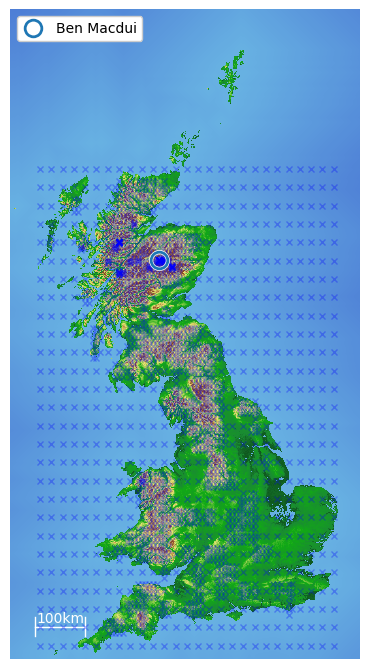

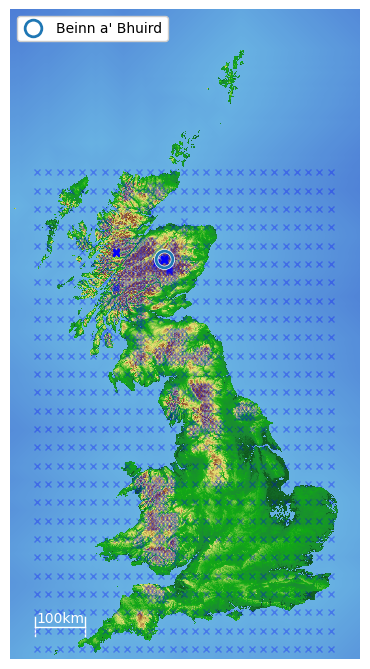

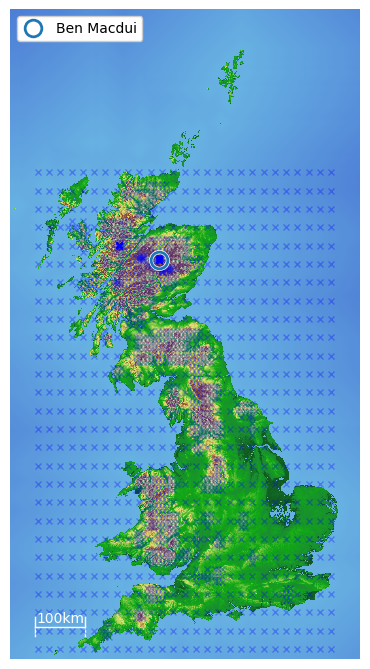

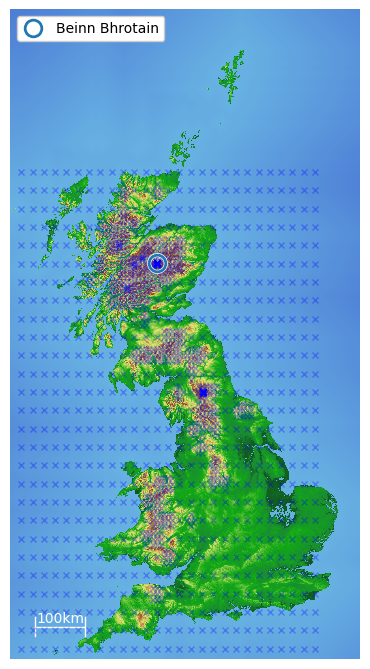

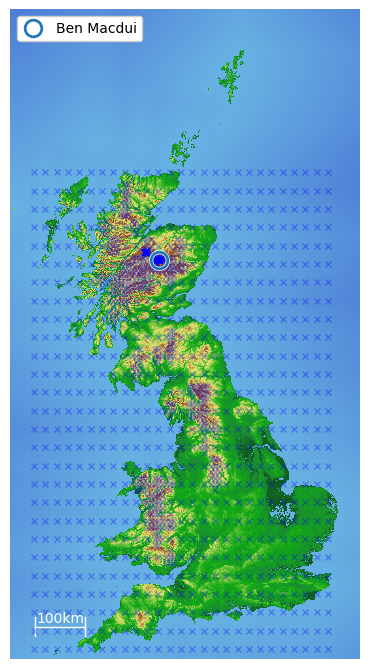

In [38]:
methods = [
    'GN_DIRECT',
    'GN_DIRECT_L',
    'GN_DIRECT_L_RAND',
    'GN_ORIG_DIRECT',
    'GN_ORIG_DIRECT_L',
]

results = []

# for method_name in methods:
for i in range(5):
    method_name = methods[1]
    method = eval(f'nlopt.{method_name}')
    x, y, z, points, pre_max = run(method)
    c = nevis.Coords(gridx=x, gridy=y)
    hill, d = nevis.Hill.nearest(c)
    # results.append((method_name, x, y, z, hill, d, points, pre_max))
    print(method_name, x, y, z, hill, d)
    nevis.print_result(x, y, z)
    nevis.plot(
        labels={
            hill.name: hill.coords
        },
        points=np.array(points),
        zoom=1/40
    )
